# Семинар 5: Логистическая регрессия

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='deep', style='darkgrid', rc={"figure.figsize": (15, 4)})
import scipy.stats as st

import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


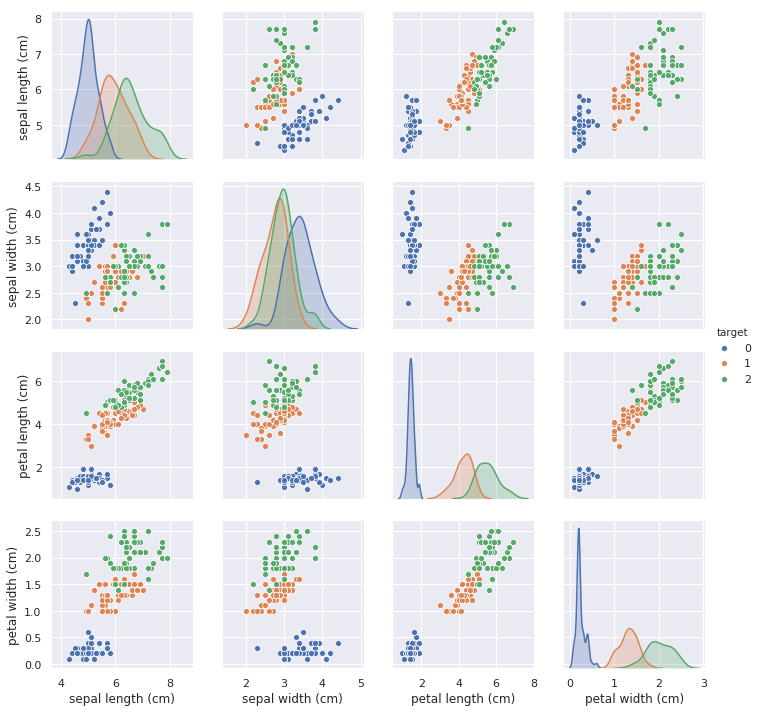

In [4]:
sns.pairplot(df, hue='target', vars=df.columns[:-1])
plt.show()

In [5]:
df['is setosa?'] = df['target'].apply(lambda x: 1 if x == 0 else 0)
df = df[['sepal length (cm)', 'sepal width (cm)', 'is setosa?']]

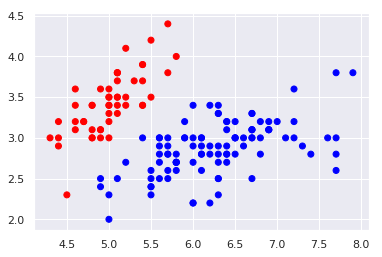

In [6]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['is setosa?'].map({0: 'blue', 1: 'red'}))
plt.show()

# Результаты использования различных функций потерь

In [7]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, f1_score

In [8]:
x = df.drop('is setosa?', axis=1)
y = df['is setosa?'].values

Accuracy:  1.0
F1:  1.0


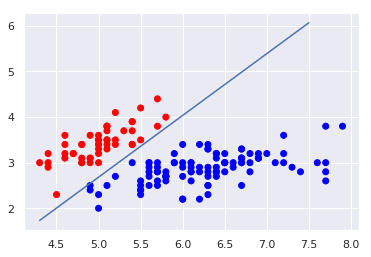

In [9]:
sgd = SGDClassifier(loss='log', max_iter=1000) #hinge, huber, log
sgd.fit(x,y)

print('Accuracy: ', accuracy_score(y, sgd.predict(x)))
print('F1: ', f1_score(y, sgd.predict(x)))

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['is setosa?'].map({0: 'blue', 1: 'red'}))
border = np.array([4.3,7.5])
plt.plot(border, (-sgd.intercept_ -  border*sgd.coef_[0,0]) / sgd.coef_[0,1])
plt.show()

# Логистическая регрессия: Пример

$$ L(M) =  \log (1+e^{-M}) $$ 
$$ M = y_i\langle w,x_i \rangle $$

In [10]:
lr = LogisticRegression()

In [11]:
lr.fit(x, y)
print(lr.coef_[0,0], lr.coef_[0,1], lr.intercept_)

-2.489665658099773 3.998906974703457 [0.80059233]


In [13]:
conclusion = pd.DataFrame(lr.predict(x), columns=['True'])
conclusion['Вероятность 0'] = lr.predict_proba(x)[:,0]
conclusion['Вероятность 1'] = lr.predict_proba(x)[:,1]
conclusion.head(5)

,True,Вероятность 0,Вероятность 1
0,1,0.109148,0.890852
1,1,0.354812,0.645188
2,1,0.130600,0.869400
3,1,0.148712,0.851288
4,1,0.060181,0.939819


In [14]:
lr.classes_

array([0, 1])

In [15]:
conclusion.tail(5)

,True,Вероятность 0,Вероятность 1
145,0,0.979835,0.020165
146,0,0.992513,0.007487
147,0,0.967249,0.032751
148,0,0.738667,0.261333
149,0,0.868951,0.131049


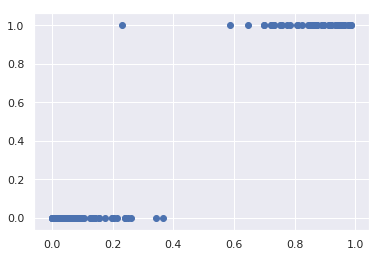

In [16]:
plt.scatter(lr.predict_proba(x)[:,1], y)

In [17]:
accuracy_score(y, lr.predict(x)), f1_score(y, lr.predict(x))

(0.9933333333333333, 0.98989898989899)

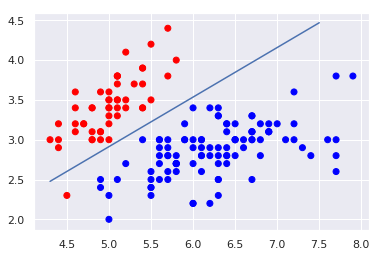

In [18]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['is setosa?'].map({0: 'blue', 1: 'red'}))
border = np.array([4.3,7.5])
plt.plot(border, (-lr.intercept_ -  border*lr.coef_[0,0]) / lr.coef_[0,1])
plt.show()

In [19]:
def logistic(x):
    return 1/(1+np.exp(x))

In [20]:
n = 1
linear = x.loc[n][0] * lr.coef_[0,0] + x.loc[n][1] * lr.coef_[0,1] + lr.intercept_[0],  
print('Значение линейной функции', linear[0])
print('Истинный класс',y[n])
print('Вероятность наблюдать класс 1:')
print('Логистическая функция' , 1-logistic(linear)[0])
print('Sklearn', lr.predict_proba(x.loc[n].values.reshape(1, -1))[0, 1])

Значение линейной функции 0.5979515335099608
Истинный класс 1
Вероятность наблюдать класс 1:
Логистическая функция 0.6451875096639048
Sklearn 0.6451875096639048


# Сложности
__Источник:__ [Открытый курс машинного обучения: Тема 4](https://habr.com/company/ods/blog/323890/#1-lineynaya-regressiya)

__XOR Проблема:__ 
XOR – это "исключающее ИЛИ",  булева функция со следующей таблицей истинности:

|   | 0 | 1 |
|---|---|---|
| 0 | 0 | 1 |
| 1 | 1 | 0 |

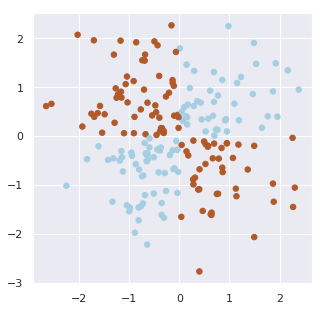

In [21]:
sns.set(palette='deep', style='darkgrid', rc={"figure.figsize": (5, 5)})
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

In [22]:

def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
    np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
    linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);



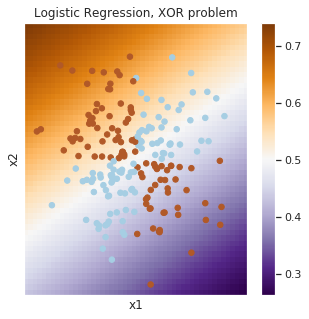

In [23]:
plot_boundary(LogisticRegression(), X, y,
"Logistic Regression, XOR problem")

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
('logit', LogisticRegression())])

plot_boundary(logit_pipe, X, y,
"Logistic Regression + quadratic features. XOR problem")